숫자 필기 데이터는 사이킷런 패키지에서 제공하는 분류용 예제 데이터입니다. 0부터 9까지의 숫자를 손으로 쓴 이미지 데이터로 load_digits() 명령으로 로드할 수 있습니다. 각 이미지는 0부터 15까지의 명암을 가지는 8 × 8 = 64 픽셀 해상도의 흑백 이미지입니다. 그리고 해당 이미지가 1,797개가 있습니다.

load_digits()를 통해 이미지 데이터를 로드할 수 있습니다. 로드한 전체 데이터를 digits에 저장합니다.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # 시각화를 위한 맷플롯립
from sklearn.datasets import load_digits
digits = load_digits() # 1,979개의 이미지 데이터 로드

In [2]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
print(digits.target[0])

0


In [4]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


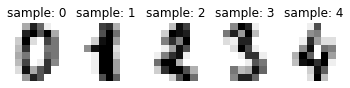

In [5]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): # 5개의 샘플만 출력
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)


이제 훈련 데이터와 레이블을 각각 X, Y에 저장해봅시다. digits.images는 모든 샘플을 8 × 8 행렬로 저장하고 있습니다. 더 나은 방법은 digts.data를 사용하는 것입니다. 이는 8 × 8 행렬을 전부 64차원의 벡터로 변환해서 저장한 상태입니다. digits.data를 이용해서 첫번째 샘플을 출력해보겠습니다.

In [6]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [7]:
X = digits.data # 이미지. 즉, 특성 행렬
Y = digits.target # 각 이미지에 대한 레이블

# 다층 퍼셉트론 분류기 만들기

In [9]:
import torch
import torch.nn as nn
from torch import optim

model = nn.Sequential(
    nn.Linear(64, 32), # input_layer = 64, hidden_layer1 = 32
    nn.ReLU(),
    nn.Linear(32, 16), # hidden_layer2 = 32, hidden_layer3 = 16
    nn.ReLU(),
    nn.Linear(16, 10) # hidden_layer3 = 16, output_layer = 10
)

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

loss_fn = nn.CrossEntropyLoss() # 이 비용 함수는 소프트맥스 함수를 포함하고 있음.
optimizer = optim.Adam(model.parameters())
losses = []

for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X) # forwar 연산
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
                epoch, 100, loss.item()
            ))

    losses.append(loss.item())

Epoch    0/100 Cost: 2.674624
Epoch   10/100 Cost: 2.158923
Epoch   20/100 Cost: 1.939708
Epoch   30/100 Cost: 1.702175
Epoch   40/100 Cost: 1.439662
Epoch   50/100 Cost: 1.162136
Epoch   60/100 Cost: 0.878419
Epoch   70/100 Cost: 0.635207
Epoch   80/100 Cost: 0.467029
Epoch   90/100 Cost: 0.359324


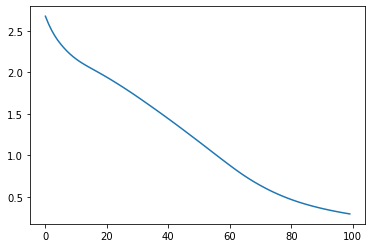

In [10]:
plt.plot(losses)